# AIボイスチェンジャー「[Seed-VC](https://github.com/Plachtaa/seed-vc)」Webアプリ起動ノートブック
- [seed-VCとは？](https://youtu.be/A1e1Sox8roU)
- できること
   - Google Colab上でSeed-VC環境を構築し、webアプリを起動＆音声変換
- TODO (実装してない事)
    - [ ] CLI実行(コマンドで指定した音声ファイルを変換する)
- 自マシン上での実行したい場合は別途[こちら](https://youtu.be/6UZmq6pcvLs?si=lLCw45T3nCRauXxo)を参照ください
    
    

# Step1「Colab GPU有効化」
- このColabページのメニュー(↑)の[編集]->[ノートブックの設定]の[ハードウェア アクセラレータ]の項目を「●● GPU」(例：T4 GPU)のいずれかに変更し、[保存]をクリック

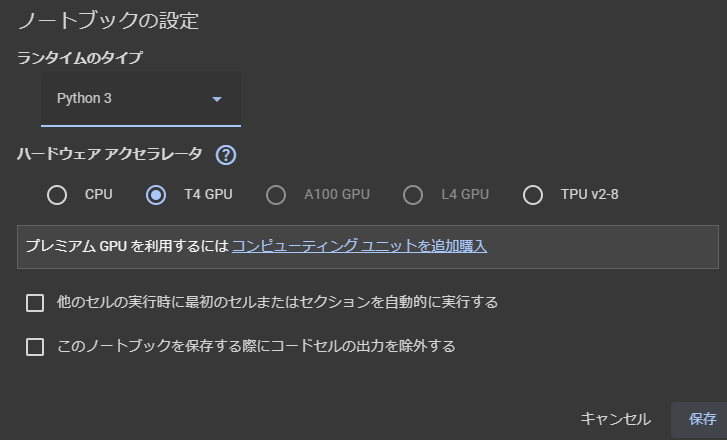

# Step2 「環境構築＆Webアプリ起動」
- 自動で環境構築＆Webアプリが起動されます
- Webアプリ起動コマンドを実行して数分後にのログにURLが2つ出ますので、2つ目の方）をクリックして別タブでWebアプリを開いてください。あとは [こちらの使い方](https://youtu.be/6UZmq6pcvLs?si=lLCw45T3nCRauXxo&t=1004) を参考に利用してください

In [ ]:
! git clone https://github.com/Plachtaa/seed-vc.git
! pip install git+https://github.com/openai/whisper.git
!pip uninstall protobuf -y
! pip install munch descript-audio-codec protobuf==3.19.0 onnxruntime==1.12.0 gradio huggingface_hub pydub Resemblyzer jiwer onnxruntime
#! pip install --upgrade protobuf

In [ ]:
# 各ライブラリインポートチェック(実行不要)
import torch
import torchvision
import torchaudio
import scipy
import librosa
from huggingface_hub import hf_hub_download
import munch
import einops
import dac
import gradio
import pydub
import resemblyzer
import jiwer
import transformers
import onnxruntime

In [ ]:
# https://github.com/comfyanonymous/ComfyUI/blob/master/notebooks/comfyui_colab.ipynb
# !wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
# !dpkg -i cloudflared-linux-amd64.deb

# import subprocess
# import threading
# import time
# import socket
# import urllib.request

# def iframe_thread(port):
#   while True:
#       time.sleep(0.5)
#       sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
#       result = sock.connect_ex(('127.0.0.1', port))
#       if result == 0:
#         break
#       sock.close()
#   print("\nComfyUI finished loading, trying to launch cloudflared (if it gets stuck here cloudflared is having issues)\n")

#   p = subprocess.Popen(["cloudflared", "tunnel", "--url", "http://127.0.0.1:{}".format(port)], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
#   for line in p.stderr:
#     l = line.decode()
#     if "trycloudflare.com " in l:
#       print("This is the URL to access ComfyUI:", l[l.find("http"):], end='')
#     #print(l, end='')

!npm install -g localtunnel

import subprocess
import threading
import time
import socket
import urllib.request

def iframe_thread(port):
  while True:
      time.sleep(0.5)
      sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
      result = sock.connect_ex(('127.0.0.1', port))
      if result == 0:
        break
      sock.close()
  print("\nSeed-VC が起動しました🎉 ↓のlocaltunnelのURLから接続してください(パスワードが必要です) \n")

  print("パスワードは「", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n").strip(),"」です")
  p = subprocess.Popen(["lt", "--port", "{}".format(port)], stdout=subprocess.PIPE)
  for line in p.stdout:
    print(line.decode(), end='')



threading.Thread(target=iframe_thread, daemon=True, args=(7860,)).start()


In [ ]:
# Webアプリ起動
!cd seed-vc && python app.py

# Step3 「結果ファイルダウンロード」
- サイドメニューのファイルに結果wavファイルが生成されるので、ダウンロードしてください










# 🚧不具合対応予定🚧 CLI実行
- CLI実行は長い音声ファイルだとエラーが出るので解決するまでコメントアウトしておきます




## 「音声ファイル配置＆音声ファイル名指定」
- この画面のサイドメニューの「ファイル」に入力音声ファイルとリファレンス音声ファイルをドラッグアンドドロップ
    - ⚠️入力音声ファイルが長い場合うまく推論できません（解決方法不明）

    

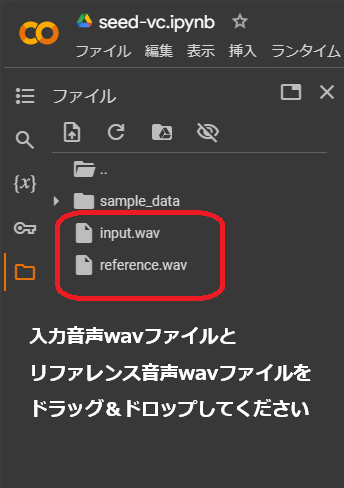

In [ ]:
# # 配置したファイルがあるか確認
# !ls

In [ ]:
# from pathlib import Path
# # 配置した音声ファイル名を指定してください
# input_wav_name = "input.wav" # 入力音声ファイル名
# output_wav_name = "reference.wav" # リファレンス音声ファイル名



In [ ]:
# cli 変換実行(結果wavファイルが作成されます)
# input_wav_path = str((Path("./") / input_wav_name).resolve().absolute())
# reference_wav_path = str((Path("./") / output_wav_name).resolve().absolute())
# !cd seed-vc && python inference.py --source {input_wav_path} --target {reference_wav_path} --output ../ --diffusion-steps 25 --length-adjust 1.0 --inference-cfg-rate 0.7 --f0-condition False --auto-f0-adjust False --semi-tone-shift 0